<a href="https://colab.research.google.com/github/Melckykaisha/Melckykaisha/blob/main/interaction_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Using the STRING databse API
We Define the protein name (GAPDH) and species (Homo sapiens - 9606)

In [ ]:
!pip install networkx requests matplotlib pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


2.we check our data set if it is loaded

In [ ]:
import requests


protein = "GAPDH"
species = 9606  # Human

# STRING API URL
url = f"https://string-db.org/api/json/network?identifiers={protein}&species={species}"

# Fetch data
response = requests.get(url)
data = response.json()

# Check first interaction
print(data[0])

{'stringId_A': '9606.ENSP00000229270', 'stringId_B': '9606.ENSP00000355890', 'preferredName_A': 'TPI1', 'preferredName_B': 'EPRS1', 'ncbiTaxonId': '9606', 'score': 0.462, 'nscore': 0.115, 'fscore': 0, 'pscore': 0, 'ascore': 0.089, 'escore': 0, 'dscore': 0, 'tscore': 0.386}


In [ ]:
import networkx as nx


G = nx.Graph()


for interaction in data:
    protein1 = interaction["preferredName_A"]
    protein2 = interaction["preferredName_B"]
    score = interaction["score"]

    G.add_edge(protein1, protein2, weight=score)

# Printed network summary
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 11
Number of edges: 35


3.Here we do our visualization

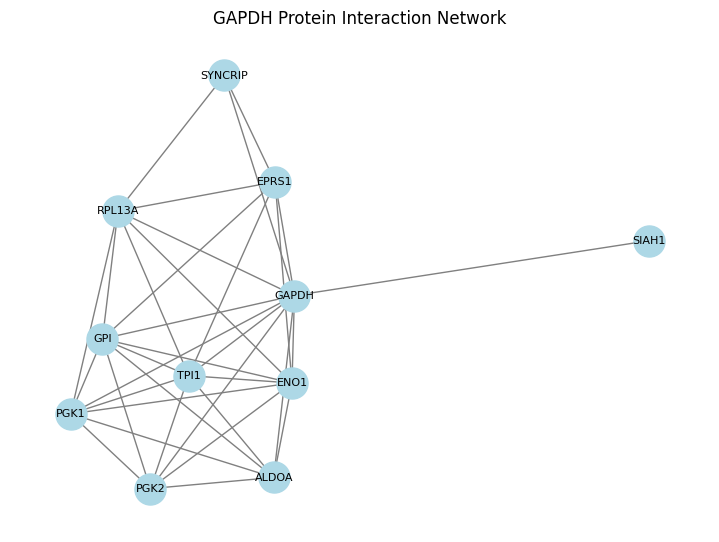

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

pos = nx.spring_layout(G)

# Drawing network
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", edge_color="gray", font_size=8)

plt.title(f"GAPDH Protein Interaction Network")
plt.show()

3.1 We still do the visualization this time using pyvis-more clear network

In [ ]:
import requests
from pyvis.network import Network
from IPython.core.display import display, HTML


protein = "GAPDH"
species = 9606


url = f"https://string-db.org/api/json/network?identifiers={protein}&species={species}"

response = requests.get(url)
data = response.json()

G = nx.Graph()

for interaction in data:
    protein1 = interaction["preferredName_A"]
    protein2 = interaction["preferredName_B"]
    score = interaction["score"]

    G.add_edge(protein1, protein2, weight=score)

net = Network(notebook=True, height="600px", width="100%", bgcolor="#222222", font_color="white", cdn_resources="in_line")

for node in G.nodes:
    net.add_node(node)

for edge in G.edges:
    net.add_edge(*edge)

net.show("gapdh_network.html")

display(HTML("gapdh_network.html"))




gapdh_network.html


4.**Network Analysis**

**Centrality measures** – identify key nodes

**Degree centrality** – nodes with the most connections.

**Betweenness centrality** – nodes that control information flow.

**Closeness centrality** – nodes that can quickly reach others.

**Clustering coefficient** – measures how interconnected the network is.

**Modularity** – detects functional communities or clusters in the network.



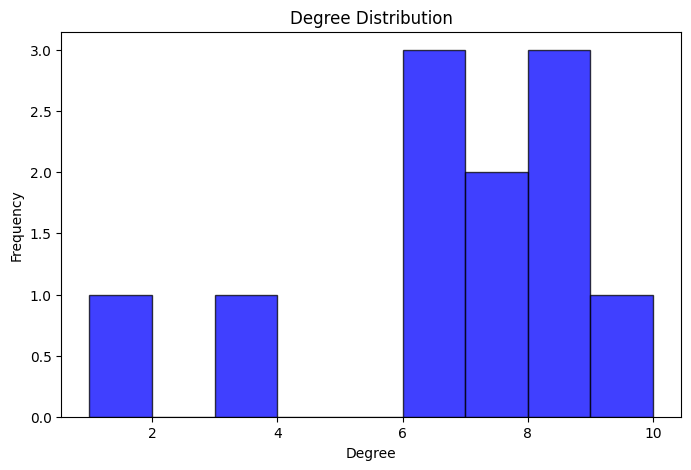

Top 5 Proteins by Closeness Centrality:
GAPDH: 1.0000
TPI1: 0.8333
ENO1: 0.8333
GPI: 0.8333
RPL13A: 0.7692
Average Clustering Coefficient: 0.7715
Modularity Score: 0.1641
Number of detected communities: 2


In [ ]:
import numpy as np
import community.community_louvain as community_louvain

# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=np.arange(min(degrees), max(degrees)+1), alpha=0.75, color="blue", edgecolor="black")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Proteins by Closeness Centrality:")
for protein, centrality in top_closeness:
    print(f"{protein}: {centrality:.4f}")

# Clustering Coefficient
clustering_coeffs = nx.clustering(G)
avg_clustering = np.mean(list(clustering_coeffs.values()))
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")

# Modularity (Community Detection using Louvain)
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print(f"Modularity Score: {modularity:.4f}")

# Show detected communities
num_communities = len(set(partition.values()))
print(f"Number of detected communities: {num_communities}")